<a href="https://colab.research.google.com/github/lucabem/Machine-Learning/blob/master/Fruit-Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
import os
from google.colab import files

### Descargando el Dataset

In [2]:
!wget https://raw.githubusercontent.com/IA1819/entregable3-lucabem/master/limones?token=AJLVMYTCAKNKZDGBN54RHQ25LJTZS -O limones.csv
!wget https://raw.githubusercontent.com/IA1819/entregable3-lucabem/master/manzanas?token=AJLVMYTWR4DIC64O73NAVSK5LJT32 -O manzanas.csv
!wget https://raw.githubusercontent.com/IA1819/entregable3-lucabem/master/naranjas?token=AJLVMYWV33K6FUIFCCGIGIS5LJT4A -O naranjas.csv
!wget https://raw.githubusercontent.com/IA1819/entregable3-lucabem/master/sandias?token=AJLVMYQTRAV4AHWYV62Y3PC5LJT4E -O sandias.csv

--2019-08-12 10:16:28--  https://raw.githubusercontent.com/IA1819/entregable3-lucabem/master/limones?token=AJLVMYTCAKNKZDGBN54RHQ25LJTZS
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74842 (73K) [text/plain]
Saving to: ‘limones.csv’

limones.csv         100%[===================>]  73.09K  --.-KB/s    in 0.03s   

2019-08-12 10:16:30 (2.82 MB/s) - ‘limones.csv’ saved [74842/74842]

--2019-08-12 10:16:32--  https://raw.githubusercontent.com/IA1819/entregable3-lucabem/master/manzanas?token=AJLVMYTWR4DIC64O73NAVSK5LJT32
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting r

### Organizandolo por carpetas

In [0]:
folder = 'naranjas'
file = 'naranjas.csv'
path = Path('data/frutas')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 500 imágenes
download_images(path/file,dest,max_pics=500)

In [0]:
folder = 'manzanas'
file = 'manzanas.csv'
path = Path('data/frutas')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=500)

In [0]:
folder = 'limones'
file = 'limones.csv'
path = Path('data/frutas')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=500)

In [0]:
folder = 'sandias'
file = 'sandias.csv'
path = Path('data/frutas')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)
os.rename(file,path/file)
# Como mucho descargamos 200 imágenes
download_images(path/file,dest,max_pics=500)

In [0]:
for c in ['manzanas','limones','sandias', 'naranjas']:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

### Mostrando Imágenes

In [0]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

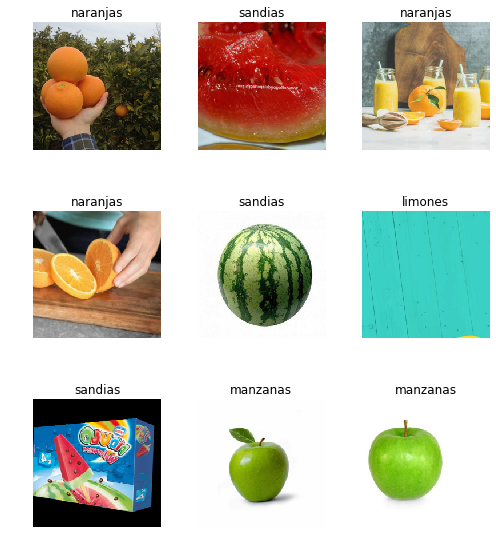

In [9]:
data.show_batch(rows=3,figsize=(7,8))

## Creando el modelo de predicción

### Distintas arquitecturas


In [10]:
learnResnet34 = create_cnn(data,models.resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 66660315.66it/s]


In [11]:
learnAlexnet =  create_cnn(data,models.alexnet,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:02<00:00, 86040859.69it/s] 


In [12]:
learnVGG19 = create_cnn(data, models.vgg19_bn, metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 574769405/574769405 [00:06<00:00, 90633181.52it/s] 


### Limpiando el Dataset

Buscamos las imagenes que peor se clasifican y borramos las 50 peores.

In [0]:
from fastai.widgets import *

In [0]:
ds,   idxs = DatasetFormatter().from_toplosses(learnResnet34,ds_type=DatasetType.Valid)

In [0]:
import posixpath

In [0]:
def borrarImagen (ruta):
  os.remove('data/frutas/' + ruta)

In [0]:
for i in range(0, 50):
  s = posixpath.normpath(ds.to_df()["x"].values[i])
  os.remove('data/frutas/' + s)

### Actualizando los pesos de las últimas capas

Una vez hemos limpiado el dataset, volvemos a crear los learn con el nuevo dataset

In [0]:
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [19]:
learnResnet34 = create_cnn(data,models.resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [20]:
learnResnet34.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.177788,0.428608,0.162393,0.837607,00:27
1,0.753214,0.346943,0.128205,0.871795,00:26
2,0.570821,0.330616,0.119658,0.880342,00:26
3,0.469012,0.319654,0.128205,0.871795,00:26


In [21]:
learnAlexnet =  create_cnn(data,models.alexnet,metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [22]:
learnAlexnet.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.328262,0.512508,0.176638,0.823362,00:24
1,0.883036,0.389754,0.136752,0.863248,00:24
2,0.697502,0.344054,0.125356,0.874644,00:23
3,0.590309,0.342793,0.122507,0.877493,00:23


In [23]:
learnVGG19 = create_cnn(data, models.vgg19_bn, metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [24]:
learnVGG19.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.155344,0.489647,0.145299,0.854701,00:59
1,0.769369,0.294535,0.119658,0.880342,00:41
2,0.578686,0.294159,0.119658,0.880342,00:40
3,0.476231,0.287153,0.108262,0.891738,00:41


In [0]:
learnResnet34.save('stageRS-1')
learnAlexnet.save('stageAL-1')
learnVGG19.save('stageVG-1')

### Descongelando la red

In [26]:
learnResnet34.load('stageRS-1')
learnAlexnet.load('stageAL-1')
learnVGG19.load('stageVG-1')

Learner(data=ImageDataBunch;

Train: LabelList (1405 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
naranjas,naranjas,naranjas,naranjas,naranjas
Path: data/frutas;

Valid: LabelList (351 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sandias,manzanas,manzanas,naranjas,manzanas
Path: data/frutas;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, 

In [0]:
learnResnet34.unfreeze()
learnAlexnet.unfreeze()
learnVGG19.unfreeze()

### Eligiendo el Ratio de Aprendizaje

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

**Calculo LR para Resnet**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


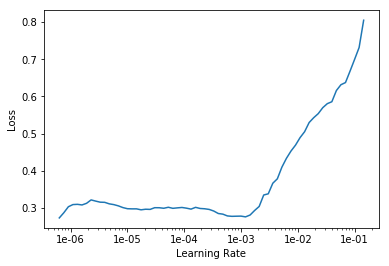

In [29]:
learnResnet34.lr_find()
learnResnet34.recorder.plot()

Como vemos en el grafico, el mejor ratio de aprendizaje en este caso es 10 a la -3

**Calculo LR para Alexnet**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


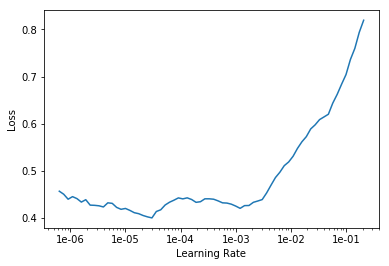

In [30]:
learnAlexnet.lr_find()
learnAlexnet.recorder.plot()

Como vemos en el grafico, el mejor ratio de aprendizaje en este caso es 10 a la -3

**Calculo LR para VGG19**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


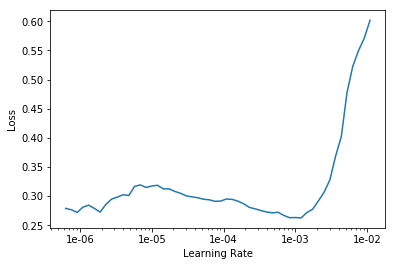

In [31]:
learnVGG19.lr_find()
learnVGG19.recorder.plot()

Como vemos en el grafico, el mejor ratio de aprendizaje en este caso es 10 a la -3

### Reentrenando las redes

In [32]:
learnResnet34.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.442637,2.033567,0.279202,0.720798,00:27
1,0.462891,0.960077,0.173789,0.826211,00:27
2,0.386642,0.369640,0.096866,0.903134,00:27
3,0.301553,0.271647,0.082621,0.917379,00:27


Como vemos hemos mejorado un  5% sobre la anterior red 

In [33]:
learnAlexnet.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.439789,0.520422,0.168091,0.831909,00:24
1,0.454117,0.877111,0.256410,0.743590,00:24
2,0.419587,0.422967,0.131054,0.868946,00:23
3,0.359542,0.318024,0.099715,0.900285,00:23


Como vemos hemos mejorado un  1% sobre la anterior red 

In [34]:
learnVGG19.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.457734,1.142105,0.270655,0.729345,00:54
1,0.527616,1.812700,0.202279,0.797721,00:54
2,0.432129,0.396161,0.113960,0.886040,00:54
3,0.349476,0.271418,0.074074,0.925926,00:54


Como vemos hemos mejorado un 2% sobre la anterior red 

In [0]:
learnResnet34.save('stageRS-2')
learnAlexnet.save('stageAL-2')
learnVGG19.save('stageVG-2')

### Interpretación de los resultados

In [36]:
learnResnet34.load('stageRS-2')
learnAlexnet.load('stageAL-2')
learnVGG19.load('stageVG-2')

Learner(data=ImageDataBunch;

Train: LabelList (1405 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
naranjas,naranjas,naranjas,naranjas,naranjas
Path: data/frutas;

Valid: LabelList (351 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sandias,manzanas,manzanas,naranjas,manzanas
Path: data/frutas;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, 

**Matriz de confusión de Resnet34**

In [0]:
interp = ClassificationInterpretation.from_learner(learnResnet34)

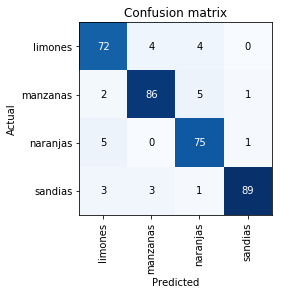

In [38]:
interp.plot_confusion_matrix()

**Matriz de confusión de Alexnet**

In [0]:
interp = ClassificationInterpretation.from_learner(learnAlexnet)

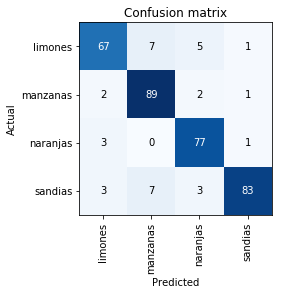

In [40]:
interp.plot_confusion_matrix()

**Matriz de confusión de VGG16**

In [0]:
interp = ClassificationInterpretation.from_learner(learnVGG19)

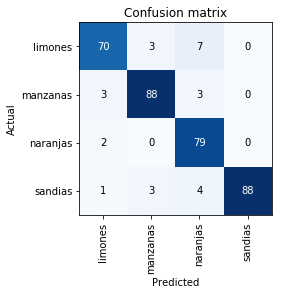

In [42]:
interp.plot_confusion_matrix()

### Poniendo el modelo en producción

In [0]:
learnResnet34.export()
learnAlexnet.export()
learnVGG19.export()

In [44]:
!wget https://www.comenaranjas.com/images/stories/virtuemart/product/manzana-granny-smith.jpg -O manzana.png

--2019-08-12 10:44:59--  https://www.comenaranjas.com/images/stories/virtuemart/product/manzana-granny-smith.jpg
Resolving www.comenaranjas.com (www.comenaranjas.com)... 176.31.31.244
Connecting to www.comenaranjas.com (www.comenaranjas.com)|176.31.31.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12388 (12K) [image/jpeg]
Saving to: ‘manzana.png’

manzana.png         100%[===================>]  12.10K  --.-KB/s    in 0s      

2019-08-12 10:45:00 (97.9 MB/s) - ‘manzana.png’ saved [12388/12388]



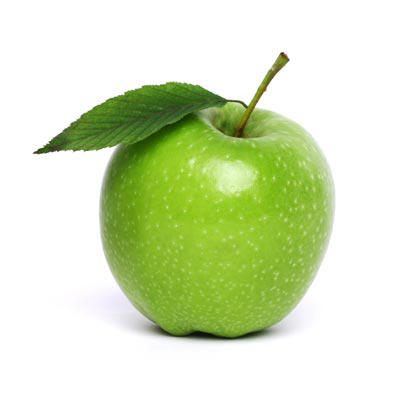

In [45]:
img = open_image('manzana.png')
img

**Ejemplo 1**

In [46]:
pred_class,pred_idx,outputs=learnResnet34.predict(img)
pred_class

Category manzanas

In [47]:
pred_class,pred_idx,outputs=learnAlexnet.predict(img)
pred_class

Category manzanas

In [48]:
pred_class,pred_idx,outputs=learnVGG19.predict(img)
pred_class

Category manzanas

**Ejemplo 2**

In [49]:
!wget https://comefruta.es/wp-content/uploads/sandia_rallada_sin_semillas2.jpg -O sandia.jpg

--2019-08-12 10:45:07--  https://comefruta.es/wp-content/uploads/sandia_rallada_sin_semillas2.jpg
Resolving comefruta.es (comefruta.es)... 158.255.238.50
Connecting to comefruta.es (comefruta.es)|158.255.238.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43038 (42K) [image/jpeg]
Saving to: ‘sandia.jpg’

sandia.jpg          100%[===================>]  42.03K  79.0KB/s    in 0.5s    

2019-08-12 10:45:09 (79.0 KB/s) - ‘sandia.jpg’ saved [43038/43038]



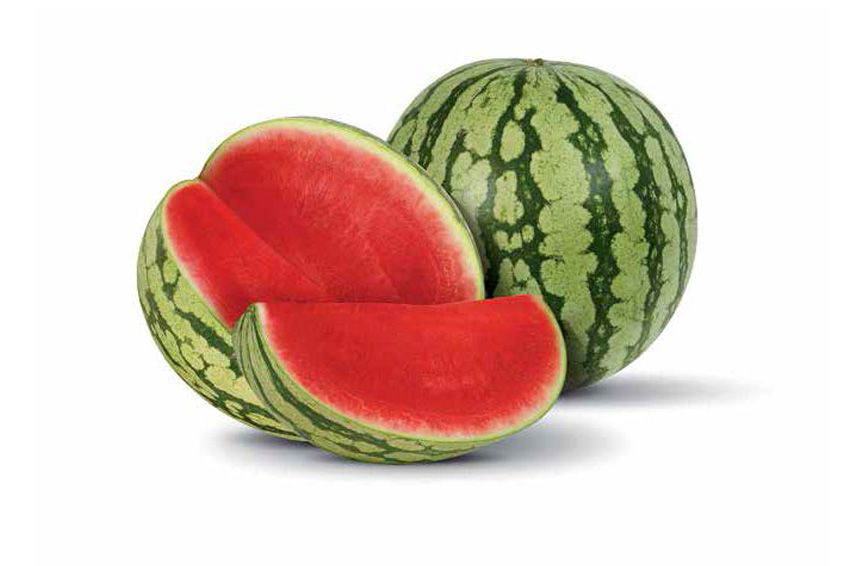

In [50]:
img = open_image('sandia.jpg')
img

In [51]:
pred_class,pred_idx,outputs=learnResnet34.predict(img)
pred_class

Category sandias

In [52]:
pred_class,pred_idx,outputs=learnAlexnet.predict(img)
pred_class

Category sandias

In [53]:
pred_class,pred_idx,outputs=learnVGG19.predict(img)
pred_class

Category sandias

**EJEMPLO 3**

In [54]:
!wget https://www.fruteriadevalencia.com/wp-content/uploads/2015/02/ZUMO-buena.jpg -O naranja.jpg

--2019-08-12 10:45:13--  https://www.fruteriadevalencia.com/wp-content/uploads/2015/02/ZUMO-buena.jpg
Resolving www.fruteriadevalencia.com (www.fruteriadevalencia.com)... 164.138.209.141
Connecting to www.fruteriadevalencia.com (www.fruteriadevalencia.com)|164.138.209.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44899 (44K) [image/jpeg]
Saving to: ‘naranja.jpg’

naranja.jpg         100%[===================>]  43.85K  74.9KB/s    in 0.6s    

2019-08-12 10:45:15 (74.9 KB/s) - ‘naranja.jpg’ saved [44899/44899]



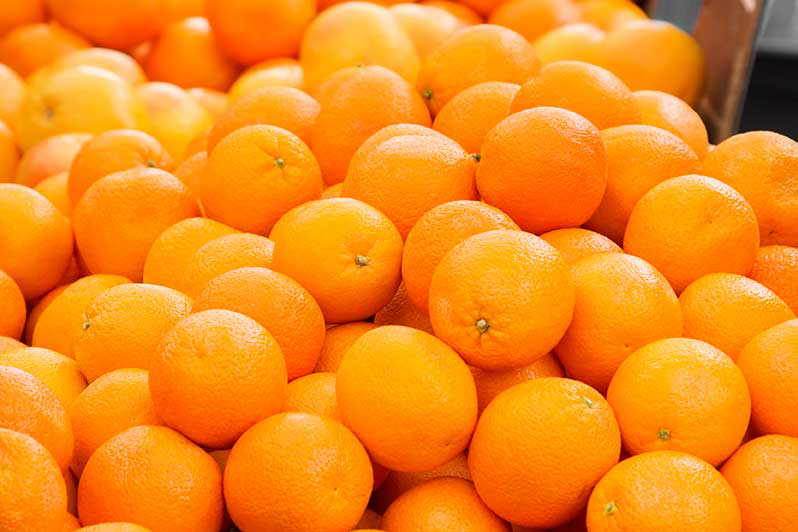

In [55]:
img = open_image('naranja.jpg')
img

In [56]:
pred_class,pred_idx,outputs=learnResnet34.predict(img)
pred_class

Category naranjas

In [57]:
pred_class,pred_idx,outputs=learnAlexnet.predict(img)
pred_class

Category naranjas

In [58]:
pred_class,pred_idx,outputs=learnVGG19.predict(img)
pred_class

Category naranjas